In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/decisiontree/Decision_Tree_ Dataset.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('/kaggle/input/decisiontree/Decision_Tree_ Dataset.csv')
df.head()

,Initial Payment,Last Payment,Credit Score,House Number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes


In [4]:
df.describe()

,Initial Payment,Last Payment,Credit Score,House Number
count,1000.00000,1000.00000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000
std,115.81539,1440.15617,259.796059,565.164179
min,100.00000,10005.00000,100.000000,3003.000000
25%,195.00000,11201.50000,302.000000,3545.000000
50%,289.50000,12450.00000,516.500000,4041.500000
75%,398.00000,13678.25000,753.500000,4507.000000
max,500.00000,14996.00000,997.000000,5000.000000


/tmp/ipykernel_33/2244768343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Last Payment'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Last Payement Distribution Plot')

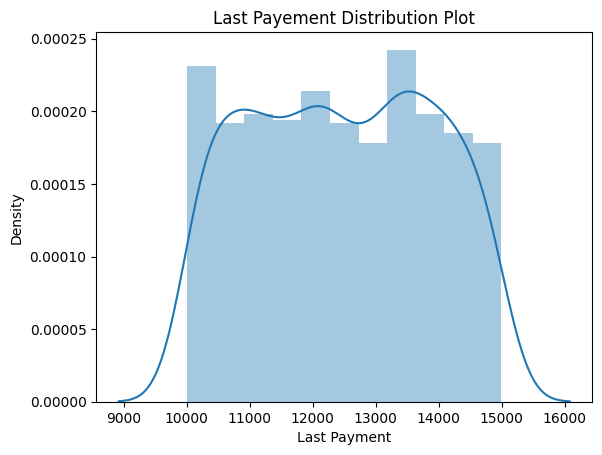

In [5]:
sns.distplot(df['Last Payment'])
plt.title("Last Payement Distribution Plot")

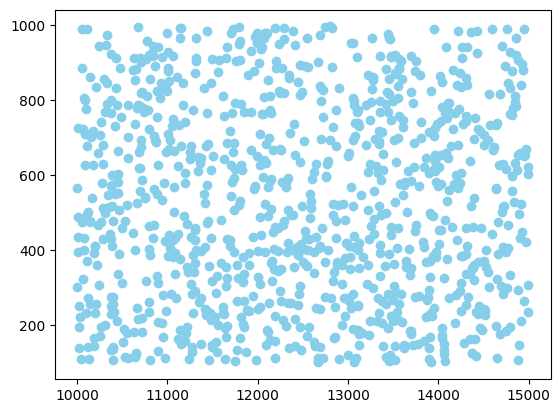

In [6]:
plt.scatter(df['Last Payment'],df['Credit Score'],color='skyblue')

In [7]:
X = df.iloc[:,0:3].values
y = df.iloc[:,4].values

In [8]:
X

array([[  201, 10018,   250],
       [  205, 10016,   395],
       [  257, 10129,   109],
       ...,
       [  316, 14872,   613],
       [  305, 14926,   897],
       [  168, 14798,   834]])

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [10]:
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [11]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'yes',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'No', 'yes',
       'yes', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',

<Axes: >

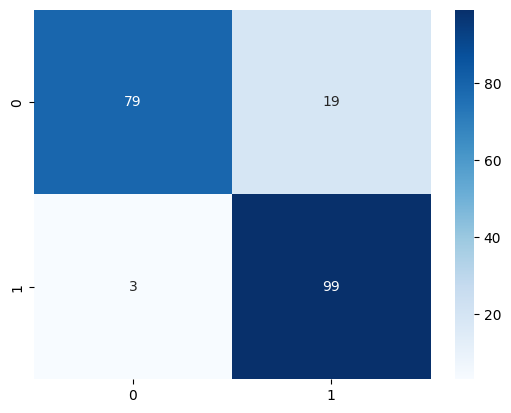

In [12]:
cm = confusion_matrix(y_test,y_pred_en)
sns.heatmap(cm,annot=True,cmap='Blues')

In [13]:
print("Classification Report")
classification_report(y_test,y_pred_en)

Classification Report


'              precision    recall  f1-score   support\n\n          No       0.96      0.81      0.88        98\n         yes       0.84      0.97      0.90       102\n\n    accuracy                           0.89       200\n   macro avg       0.90      0.89      0.89       200\nweighted avg       0.90      0.89      0.89       200\n'

In [14]:
accuracy_score(y_test,y_pred_en)

0.89

In [17]:
text_representation = tree.export_text(clf_entropy)
print(text_representation)

|--- feature_1 <= 12545.00
|   |--- feature_1 <= 11716.50
|   |   |--- feature_0 <= 472.00
|   |   |   |--- class: yes
|   |   |--- feature_0 >  472.00
|   |   |   |--- class: yes
|   |--- feature_1 >  11716.50
|   |   |--- feature_1 <= 11898.50
|   |   |   |--- class: yes
|   |   |--- feature_1 >  11898.50
|   |   |   |--- class: yes
|--- feature_1 >  12545.00
|   |--- feature_1 <= 13281.50
|   |   |--- feature_2 <= 431.00
|   |   |   |--- class: No
|   |   |--- feature_2 >  431.00
|   |   |   |--- class: No
|   |--- feature_1 >  13281.50
|   |   |--- feature_0 <= 128.50
|   |   |   |--- class: No
|   |   |--- feature_0 >  128.50
|   |   |   |--- class: No



In [23]:
X = pd.DataFrame(X)

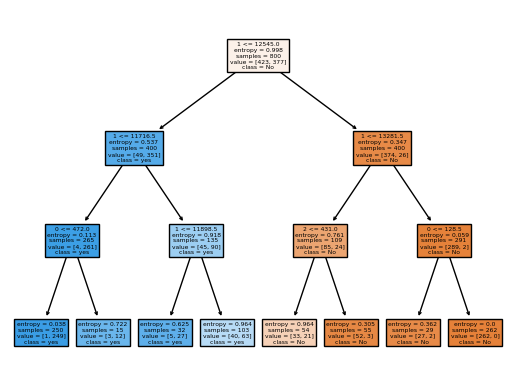

In [24]:
class_names_list = clf_entropy.classes_.tolist()
_=tree.plot_tree(clf_entropy,feature_names=X.columns.tolist(),class_names=class_names_list,filled=True)